### Data
from : [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview)

### Notebook by
- corazzon's [Kaggle Struggle](https://github.com/corazzon/KaggleStruggle)
- Ashwini Swain's [EDA To Prediction(DieTanic)](https://www.kaggle.com/ash316/eda-to-prediction-dietanic)

### Library load

In [173]:
import pandas as pd
import numpy as np

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
sns.set()

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [175]:
import warnings 
warnings.filterwarnings('ignore')

### Data load

In [176]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [177]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [178]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In test dataset, column `'Survived'` is not included for prediction purposes.

### EDA with features

#### Features

* Survival - Survival. 0 = No, 1 = Yes
* Pclass - Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd
* Sex - Sex.
* Age - Age in years.
* SibSp - # of siblings / spouses aboard the Titanic.
* Parch - # of parents / children aboard the Titanic.
* Ticket - Ticket number.
* Fare - Passenger fare.
* Cabin - Cabin number.
* Embarked - Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton

#### Types of features

In [179]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Both quantitative and qualitative data types are shown above. 
- quantitative : int64, float64
- qualitative : object

In [180]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [181]:
train.nunique()[train.nunique() < 8]

Survived    2
Pclass      3
Sex         2
SibSp       7
Parch       7
Embarked    3
dtype: int64

Although they are listed as 'numeric', some of the selected columns above which have unique labels under 8 can be **categorical** variables. 

![dtype diagram](./img/Data-type.png)

* categorical : 'Sex', 'Embarked'
* ordinal : 'Pclass'
* continuous : 'Age'
* discrete : 'SibSp', 'Parch'

#### Target variable : 'Survived'

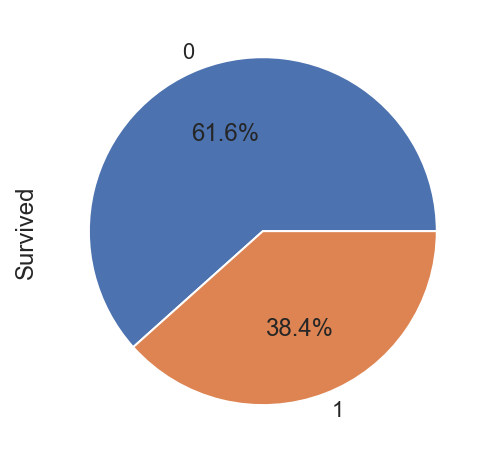

In [182]:
# pie chart
train['Survived'].value_counts().plot.pie(autopct='%1.1f%%')

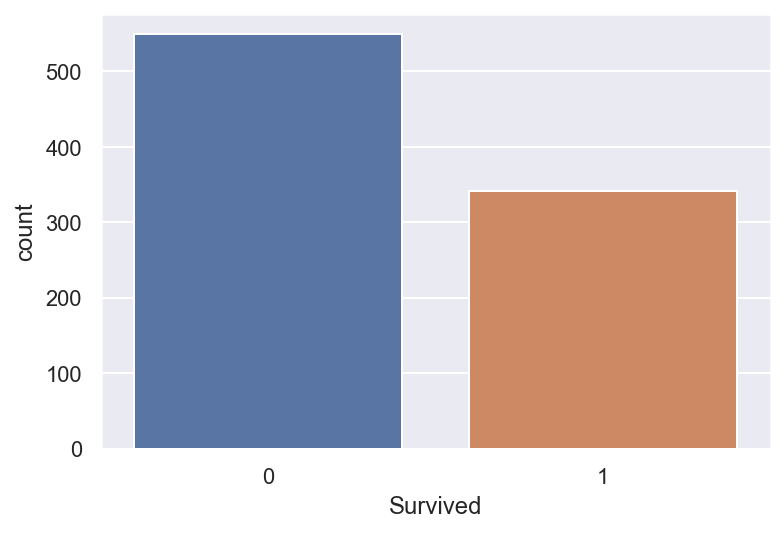

In [183]:
# countplot
sns.countplot(data=train, x='Survived')

Only **38.4%** of people on the ship were survived.

#### Qualitative features

        Survived
Sex             
female  0.742038
male    0.188908


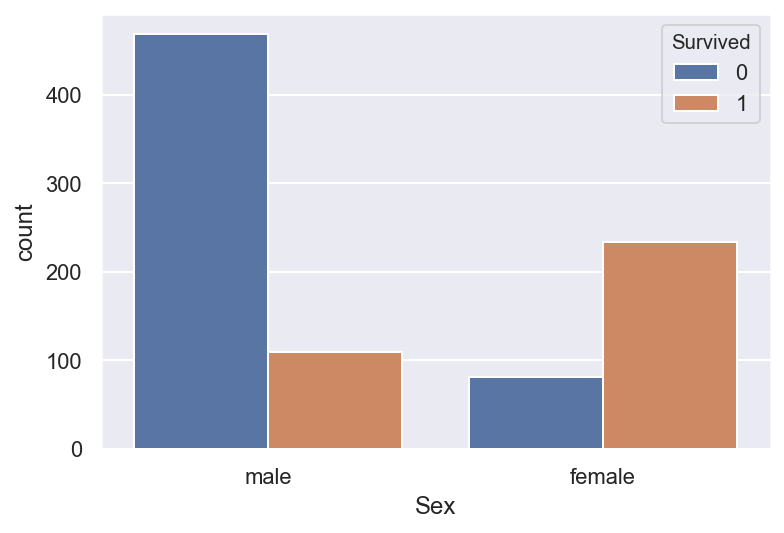

In [184]:
# 'Sex' : categorical
print(train.groupby('Sex')[['Survived']].mean())
sns.countplot(data=train, x='Sex', hue='Survived')

Women have a higher survival rate as **75%** whereas men only have survival rate around **19%**.

In [185]:
# 'PClass' : ordinal
pd.crosstab(index=train.Pclass, columns=train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


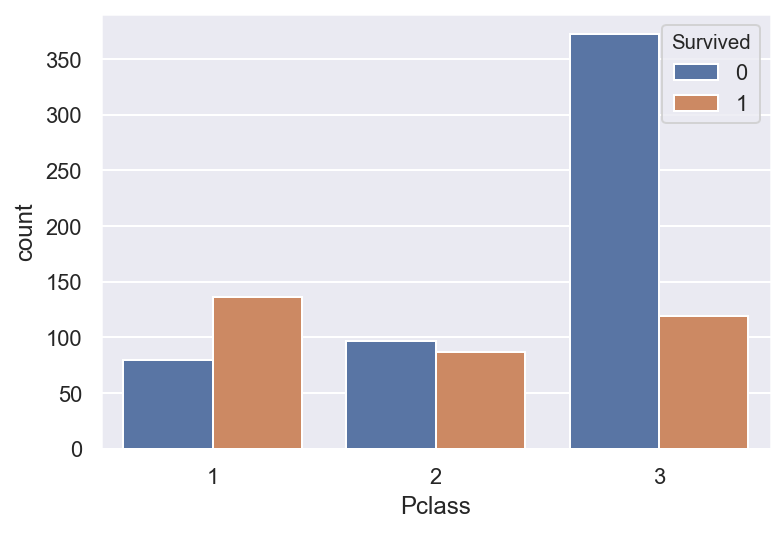

In [186]:
sns.countplot(data=train, x='Pclass', hue='Survived')

Pclass 1 survived is around **63%**, followed by 2 with 48% and 3 with 24%.

In [187]:
# 'Sex' & 'Pclass'
# crosstable
pd.crosstab(index=[train.Sex, train.Survived], columns=train.Pclass, margins=True).style.background_gradient(cmap='summer_r')

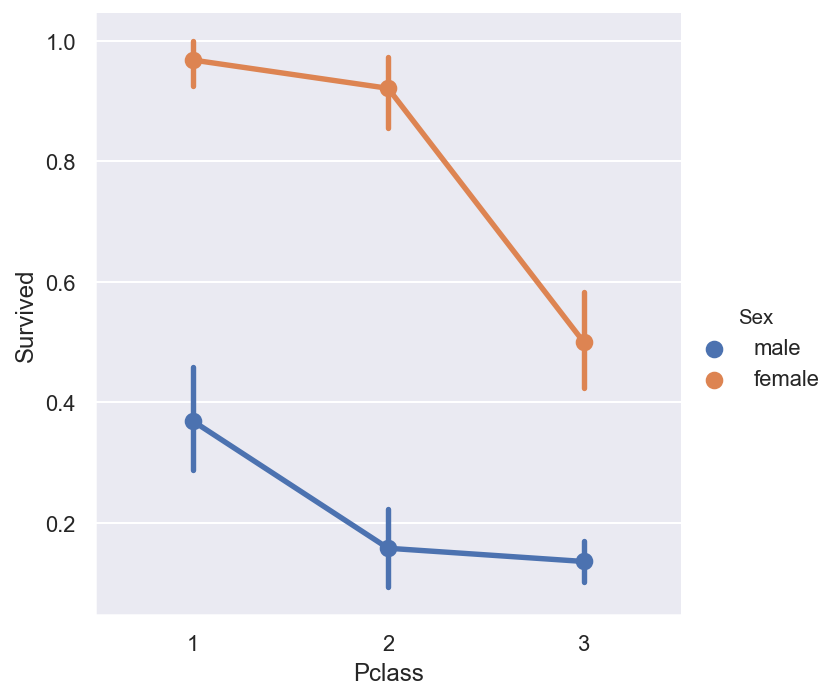

In [188]:
# factorplot
sns.factorplot(data=train, x='Pclass', y='Survived', hue='Sex')

As 'Pclass' lowers, survival rate for female passengers drops dramatically in comparison to male counterparts.

In [189]:
train.pivot_table(values='Survived', index=['Sex', 'Pclass'], aggfunc=np.mean)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

Taking both 'Sex' & 'Pclass' into account,<br>
women in Pclass 1 have the highest survival rate, **96%**.

In [190]:
# 'Embarked' : categorical
# print(train.groupby('Embarked')[['Survived']].mean())
pd.crosstab(index=[train.Embarked, train.Pclass], columns=[train.Sex, train.Survived], margins=True).style.background_gradient(cmap='summer_r')

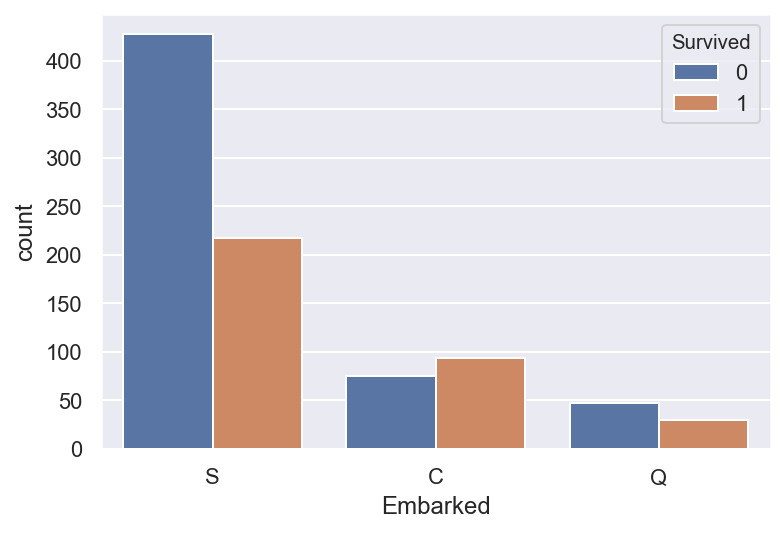

In [191]:
sns.countplot(data=train, x='Embarked', hue='Survived')

<Figure size 1080x504 with 0 Axes>

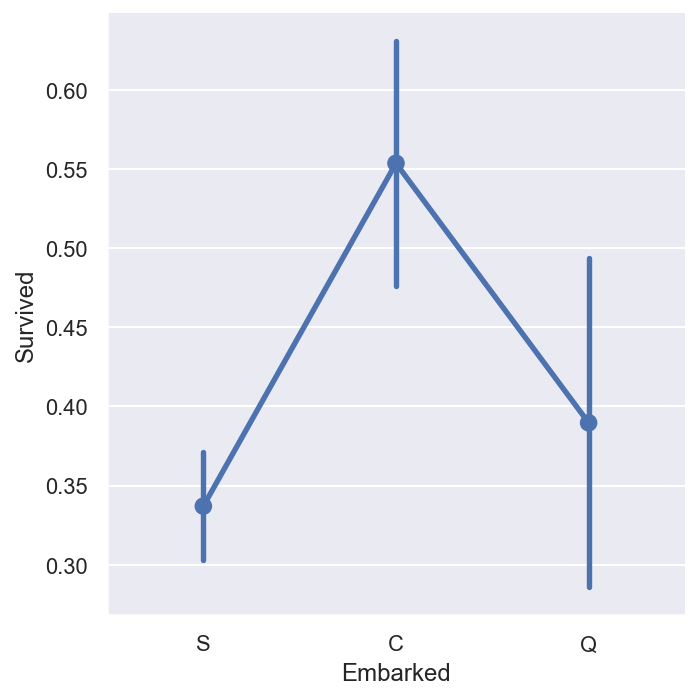

In [192]:
plt.figure(figsize=(15, 7))
sns.factorplot(data=train, x='Embarked', y='Survived')

People who got on the ship from **Southampton** are majority in counting, however, in proportion, people boarded on **Cherbourg** survived the most.  

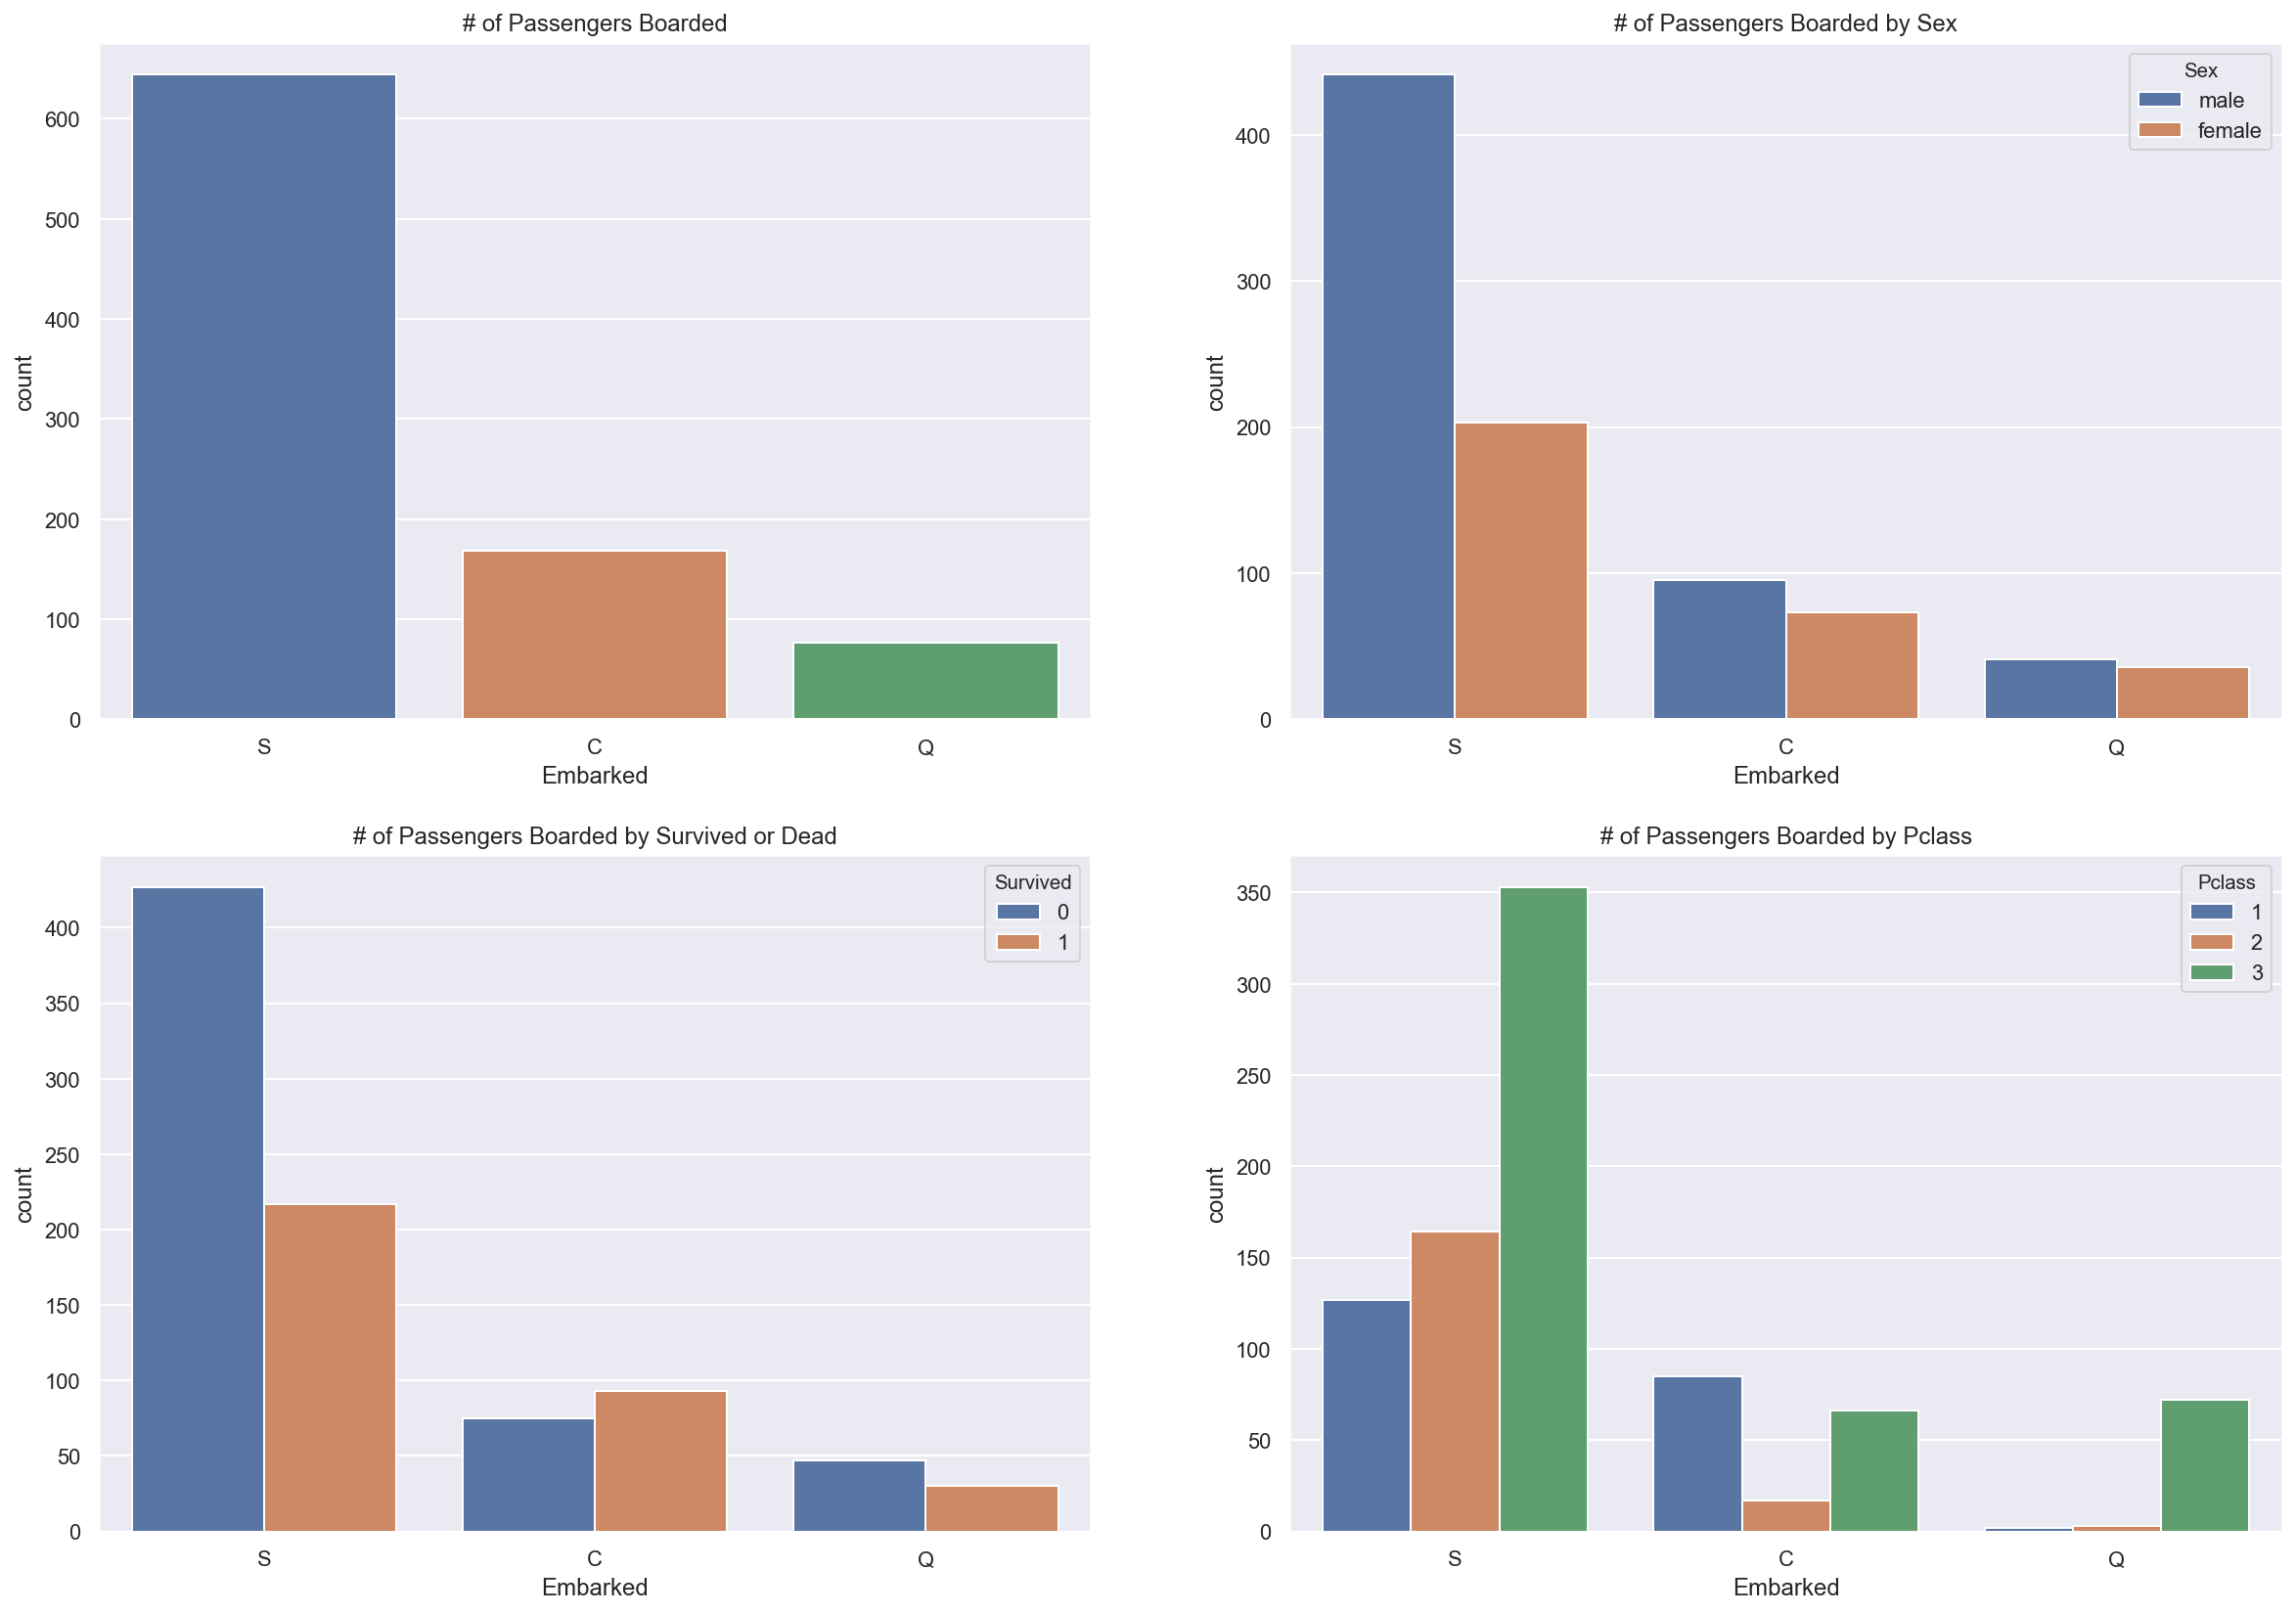

In [193]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

sns.countplot(data=train, x='Embarked', ax=axes[0, 0])
axes[0, 0].set_title('# of Passengers Boarded')

sns.countplot(data=train, x='Embarked', hue='Sex', ax=axes[0, 1])
axes[0, 1].set_title('# of Passengers Boarded by Sex')

sns.countplot(data=train, x='Embarked', hue='Survived', ax=axes[1, 0])
axes[1, 0].set_title('# of Passengers Boarded by Survived or Dead')

sns.countplot(data=train, x='Embarked', hue='Pclass', ax=axes[1, 1])
axes[1, 1].set_title('# of Passengers Boarded by Pclass')

plt.show()

1. People boarded the most from S, and most of them were from Pclass 3.

2. People who borded from C are the only group with higher counting for survival than dead. This might be responsible due to the fact that most of them were in Pclass 1. 

3. Almost 95 % of people from port Q were from Pclass 3, leaving them lowering the possibility of survival.

<Figure size 2160x1296 with 0 Axes>

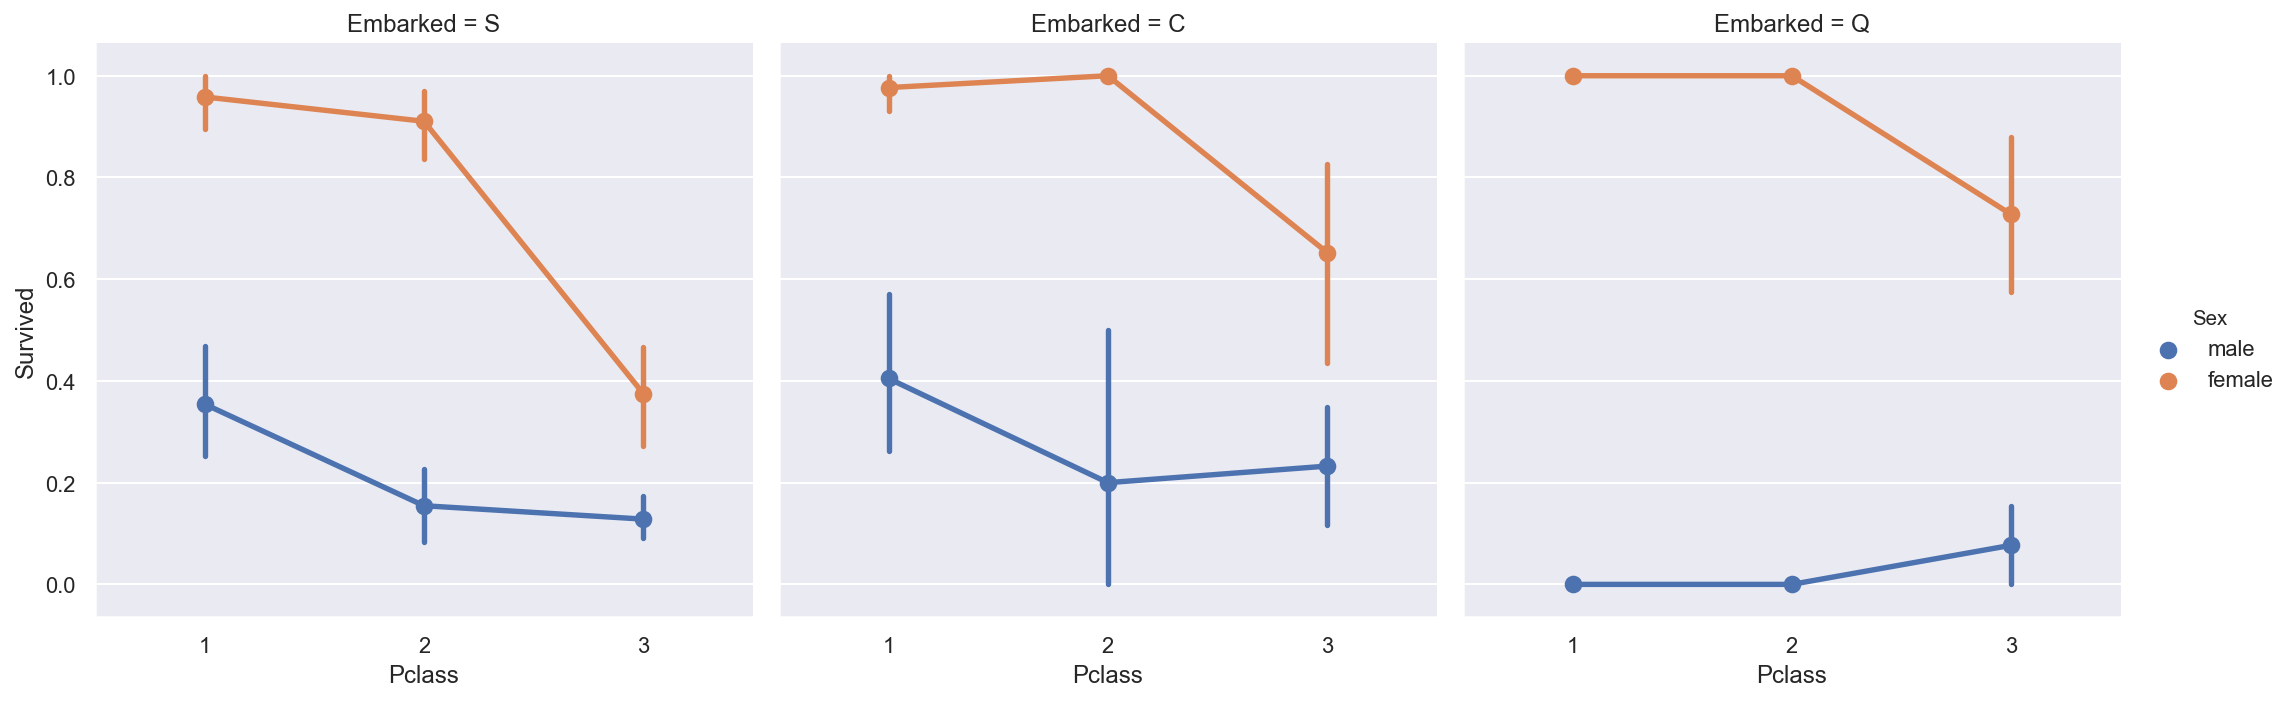

In [194]:
plt.figure(figsize=(30, 18))
sns.factorplot(data=train, x='Pclass', y='Survived', hue='Sex', col='Embarked')

1. Survival chances for women from Pclass 1 & 2 are almost 1 disregarding the boarded port.

2. The lowest survival rate for both gender seems to be port S for women in Pclass 3 and port Q for men in Pclass 3.

#### Quantitative features

In [195]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Using `.describe()`<br>
it's possible to see descriptive statistics of numeric variables only.

Here are variables which are not meaningful via descriptive stats. 
* PassengerID : for identification purposes  
* Pclass : categorical variable

* SibSp & Parch also don't seem insightful with descriptive stats.

In [196]:
num_cols = train.dtypes[train.dtypes != 'object'].index.tolist()
num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

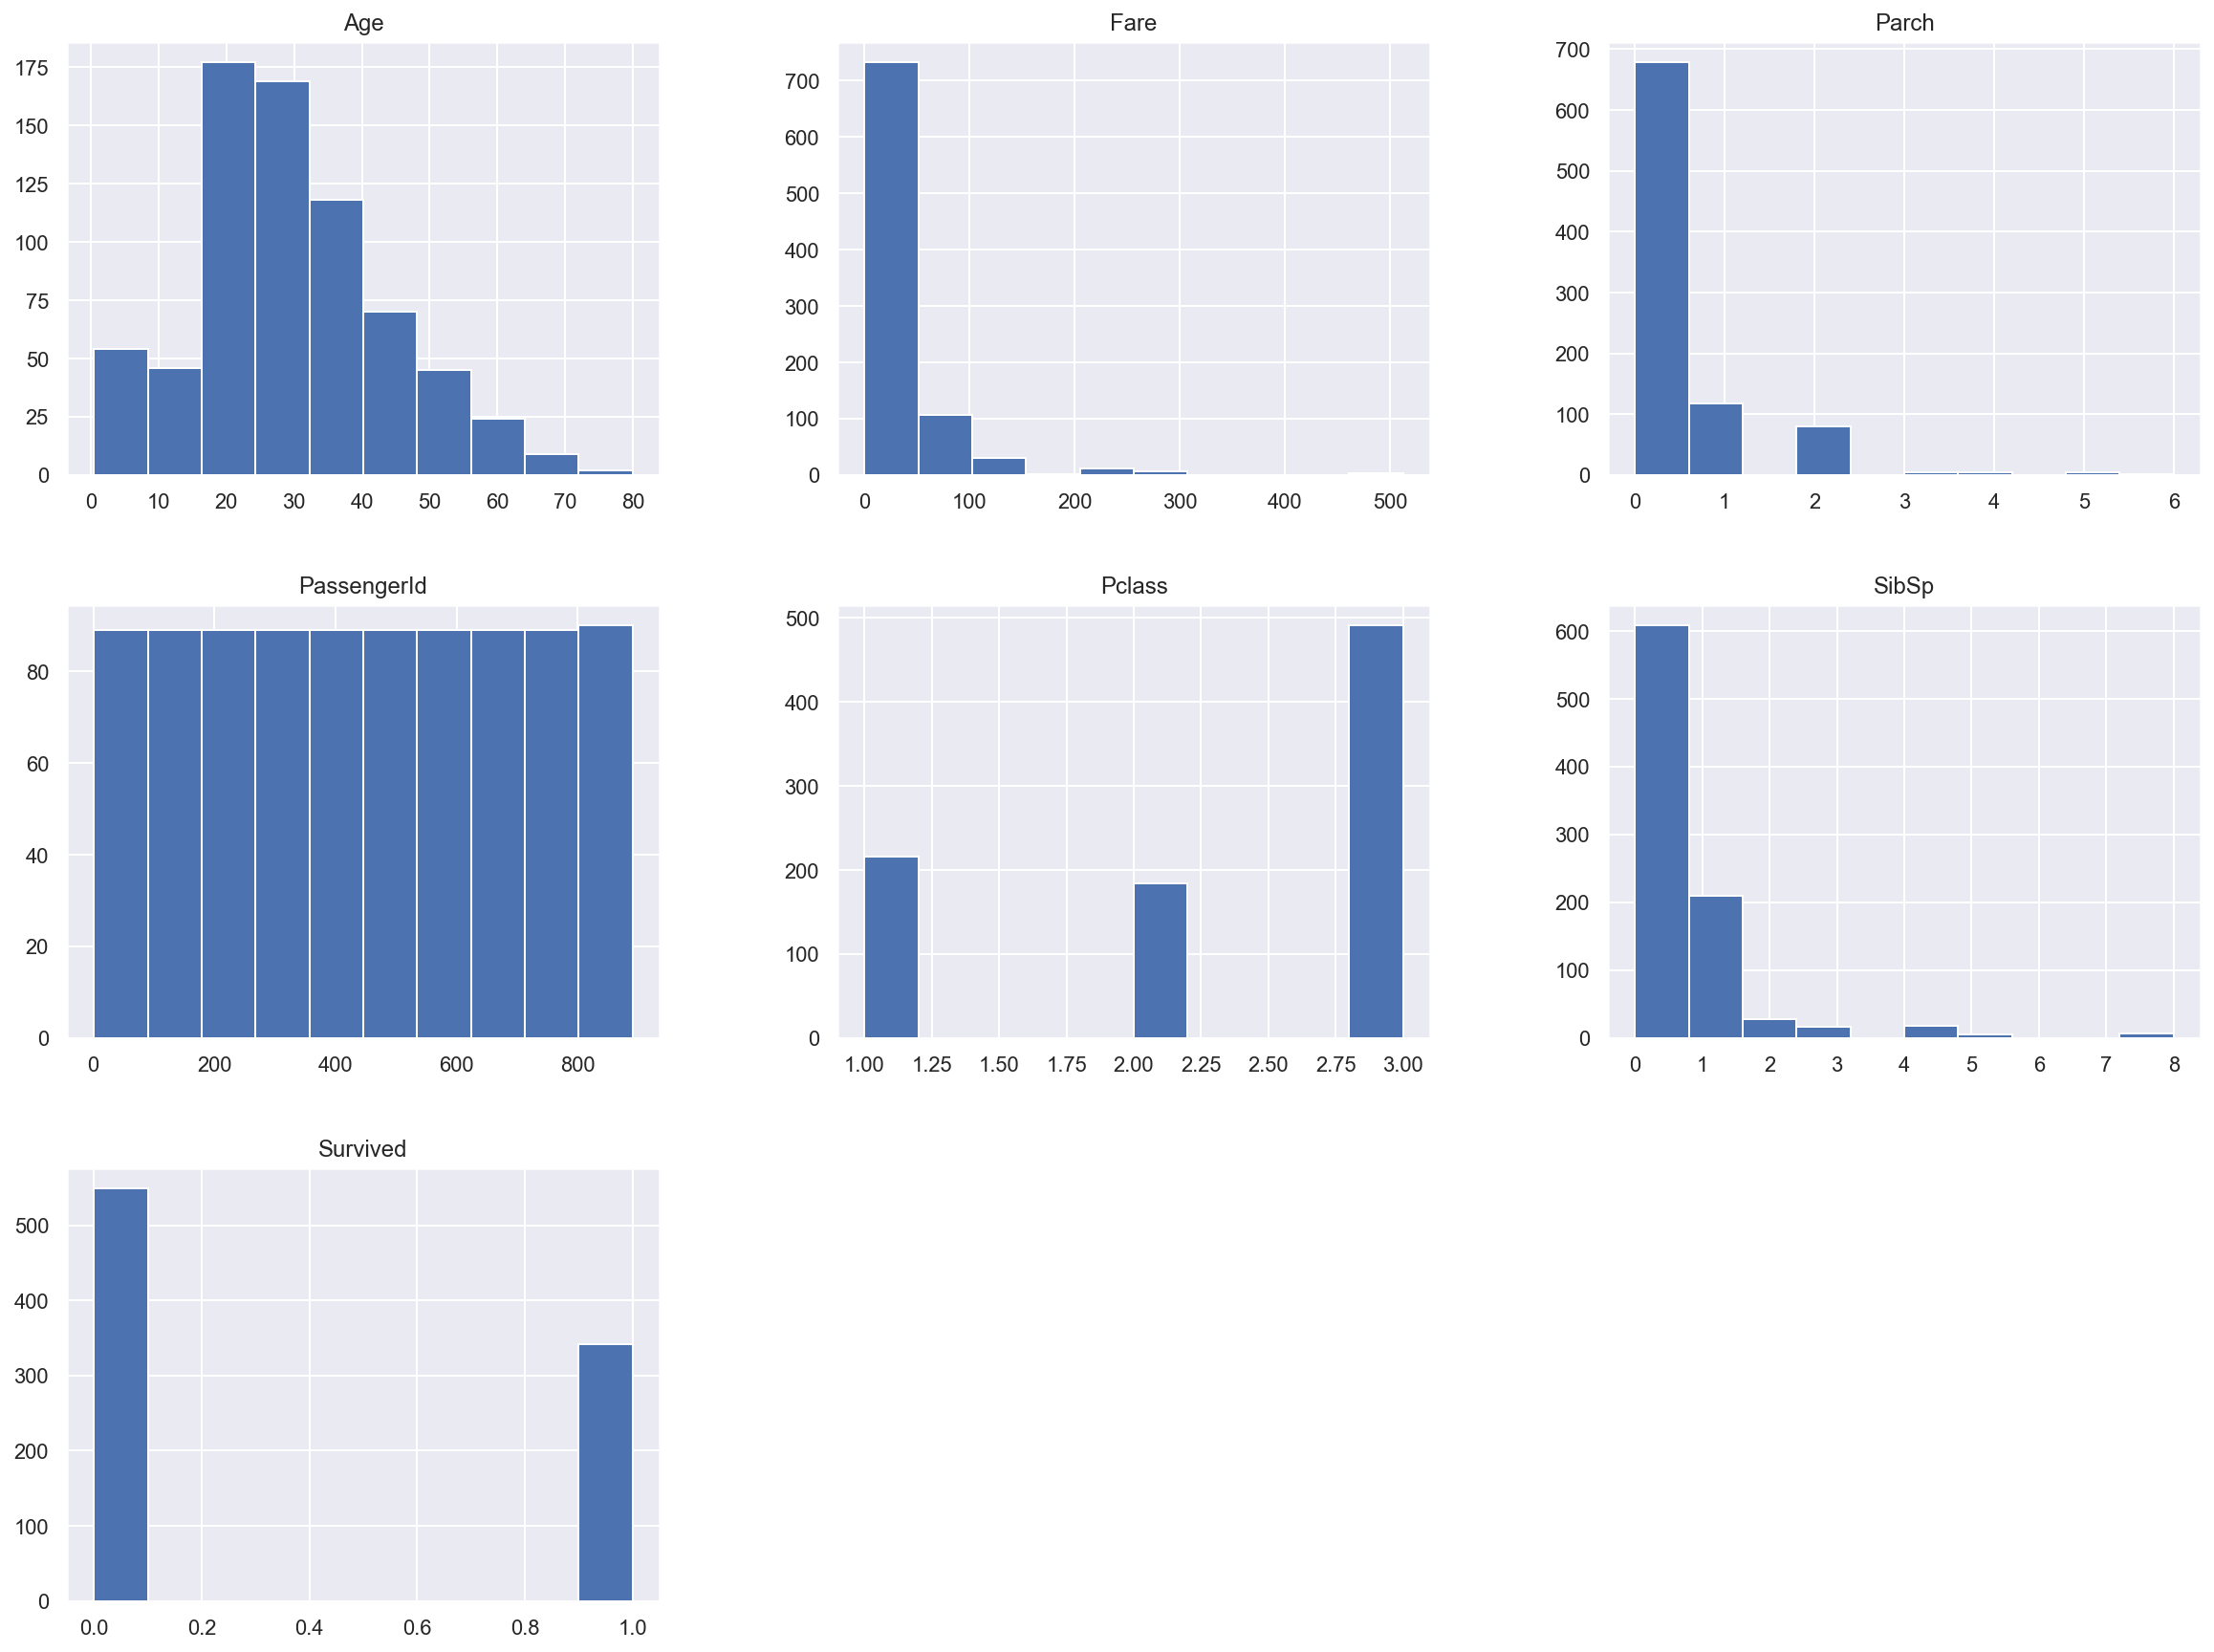

In [197]:
h = train[num_cols].hist(figsize=(20, 15))

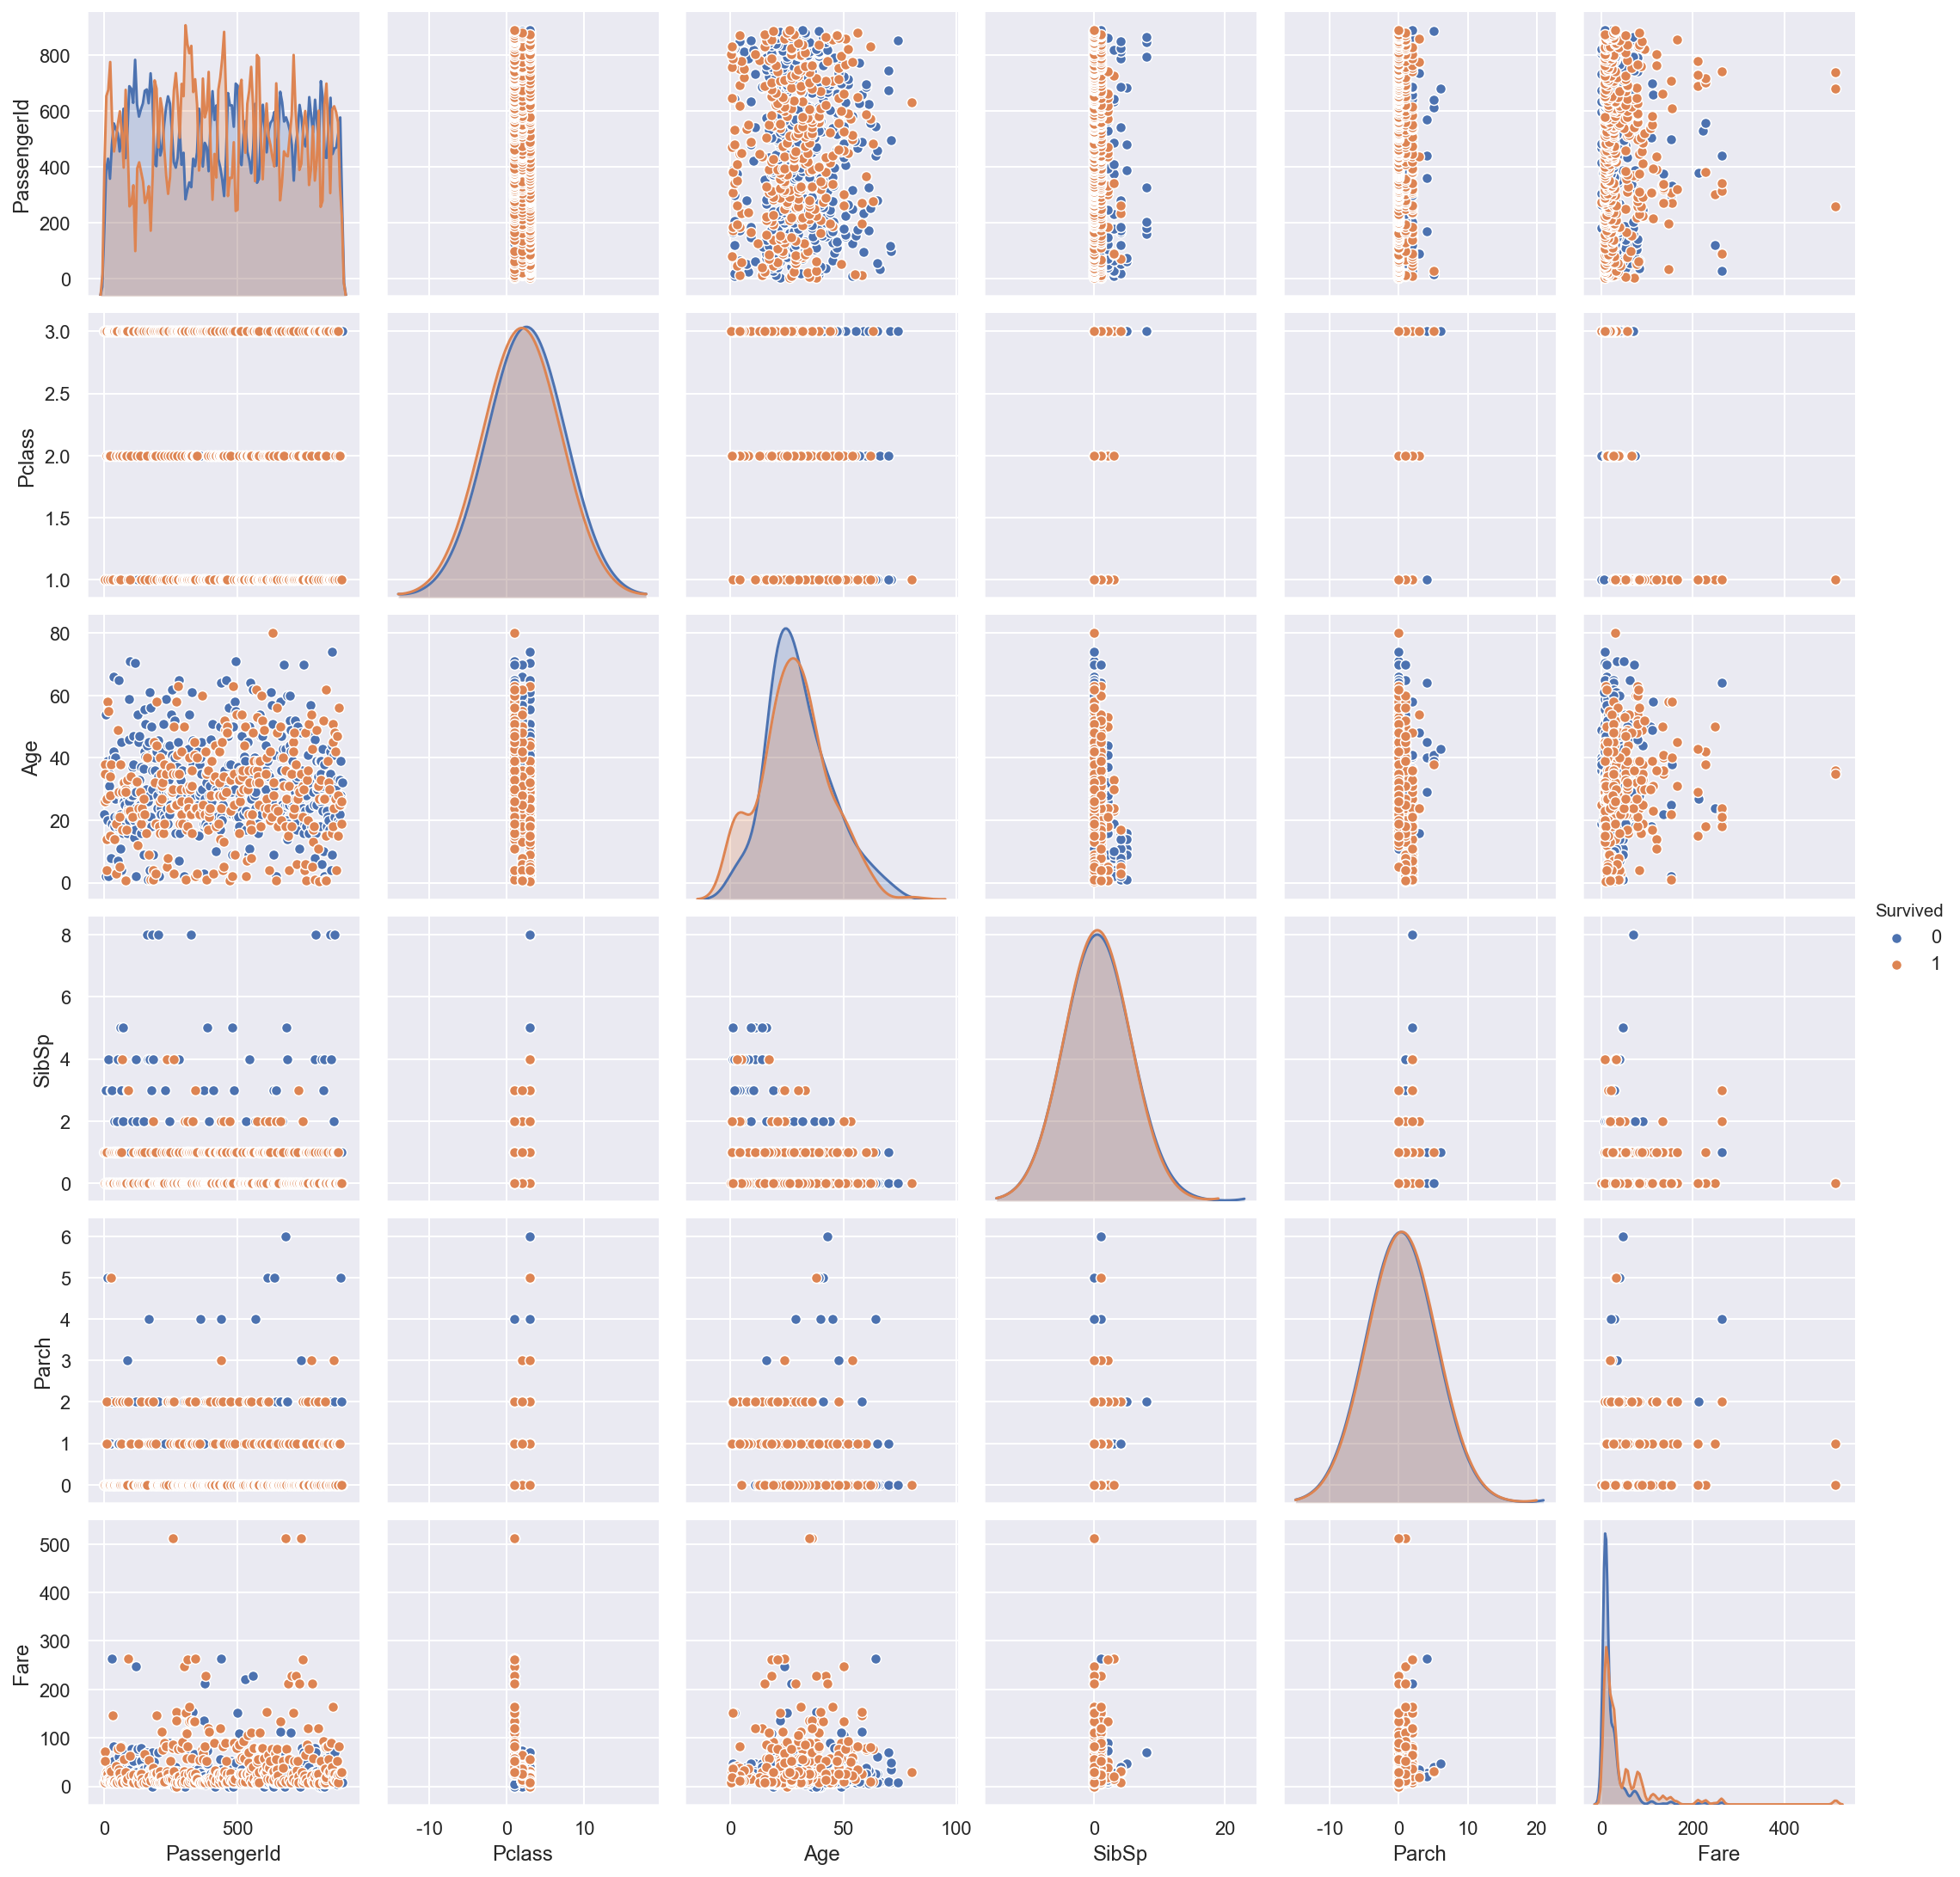

In [198]:
sns.pairplot(train[num_cols], hue='Survived', diag_kws={'bw':5})

In [199]:
num_cols.remove('PassengerId')

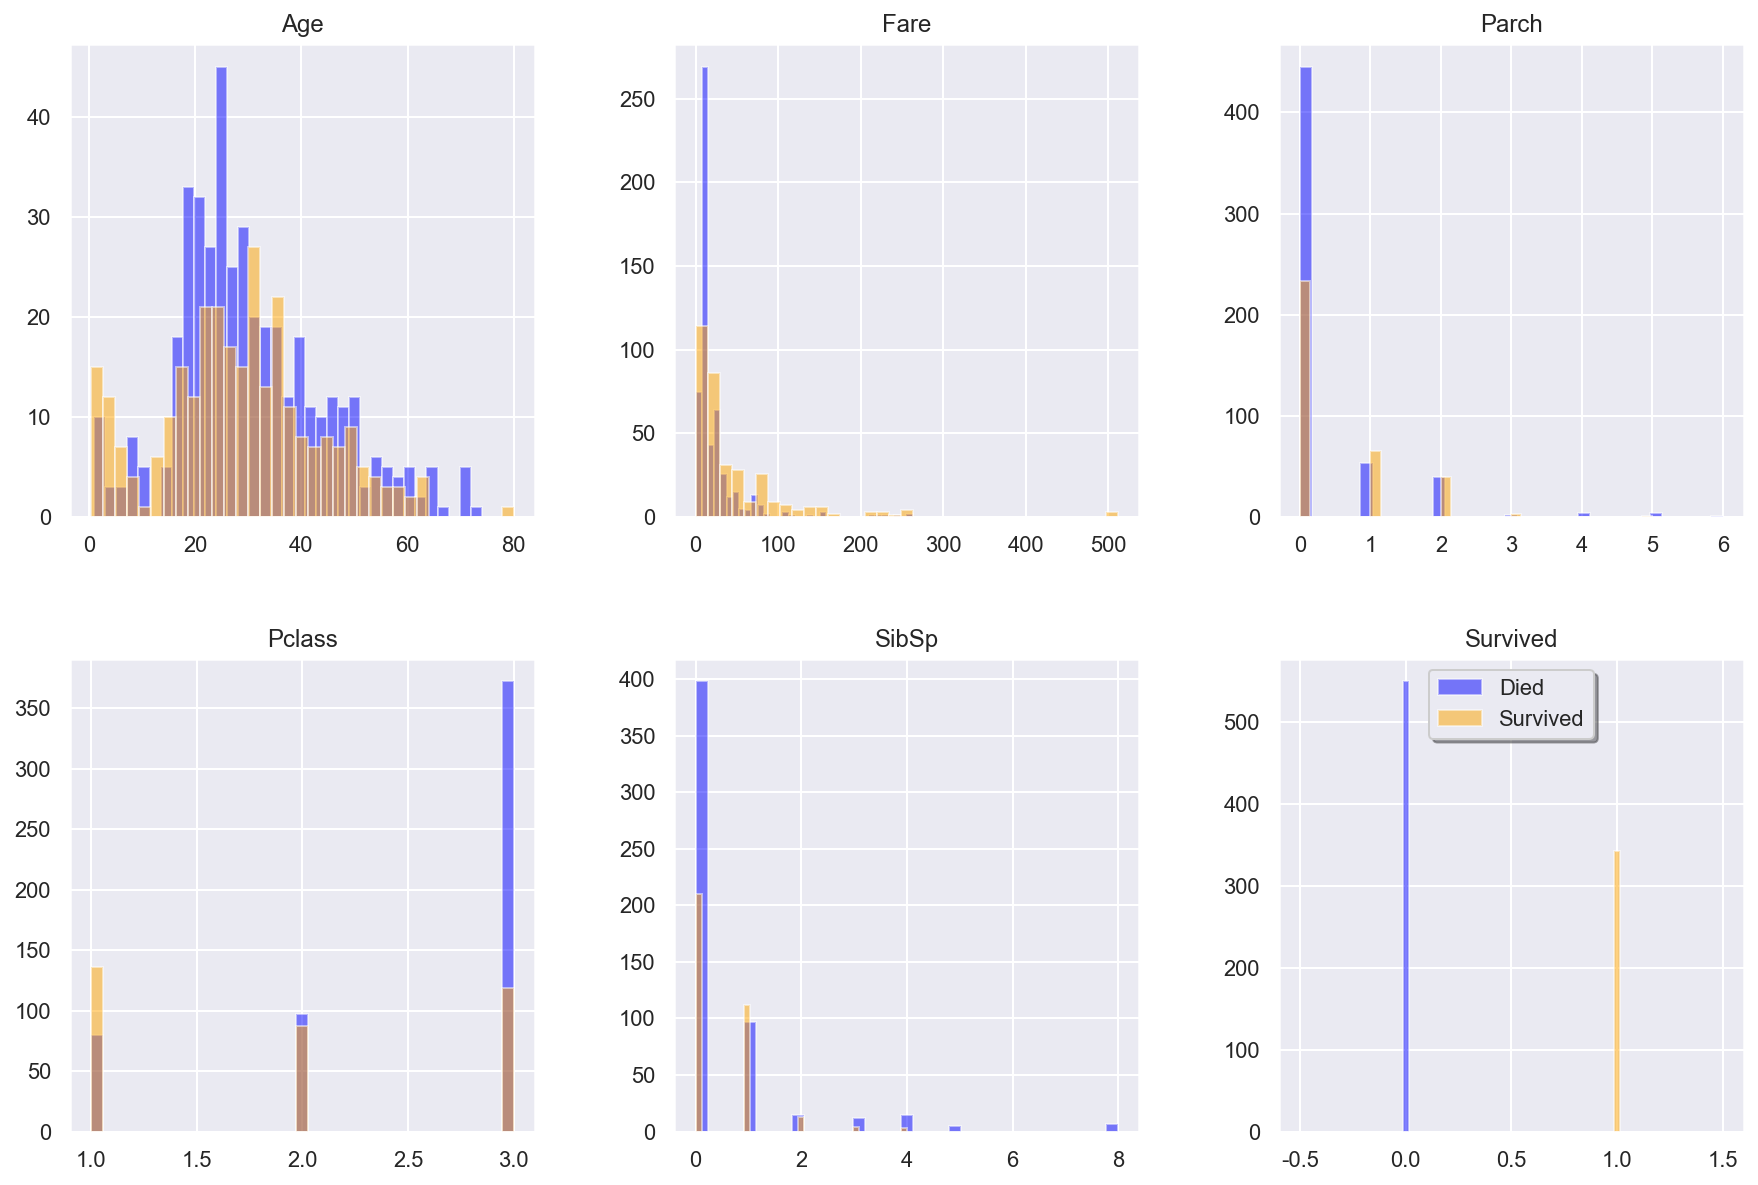

In [200]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

train[train['Survived'] == 0][num_cols].hist(bins=35, color='blue', alpha=0.5, ax=axes)
train[train['Survived'] == 1][num_cols].hist(bins=35, color='orange', alpha=0.5, ax=axes)

plt.legend(['Died', 'Survived'], shadow=True, loc=9)

In [201]:
# 'Age' : continuous
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Oldest passenger is **80** years old,<br>
youngest passenger is **0.42** years old,<br>
and average age on the ship is about **29.7** years old.

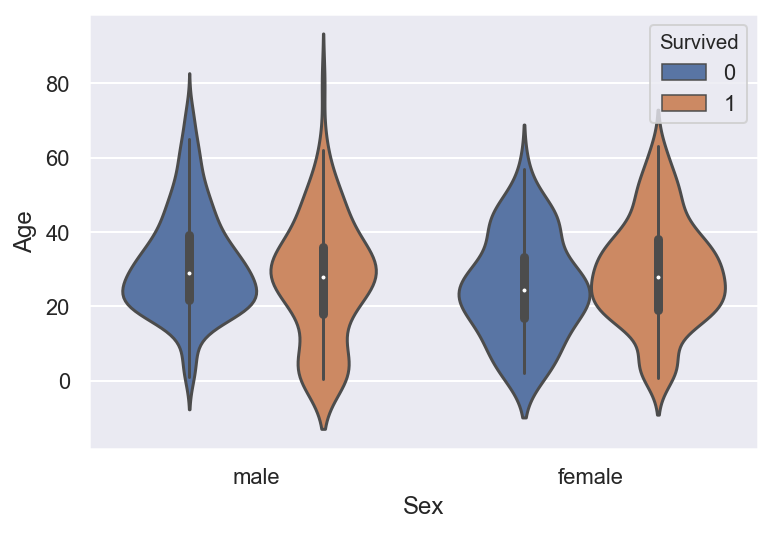

In [202]:
# 'Age' with 'Sex'
sns.violinplot(data=train, x='Sex', y='Age', hue='Survived')

In order to statistically validate whether these two groups' mean values are statistically different or not, **t-test** should be conducted.  

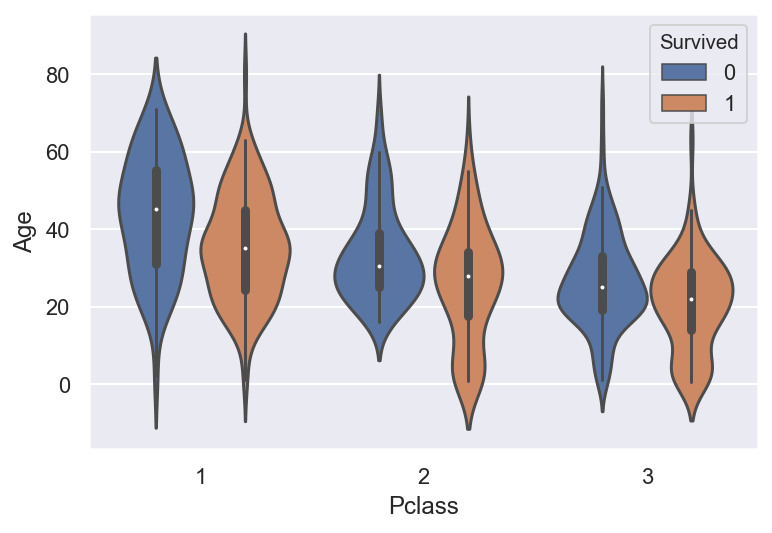

In [203]:
# 'Age' with 'Pclass'
sns.violinplot(data=train, x='Pclass', y='Age', hue='Survived')

1. Towards Pclass 3, age lowers. And the younger, the higher rate for survival. 

2. In age between 20 and 60, the highest survival chances is placed for Pclass 1 for both gender and even better for women. 

3. The likelihood for survival decreases as men gets older. 

In [204]:
# 'SibSp' : discrete
train.groupby('SibSp')['Survived'].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

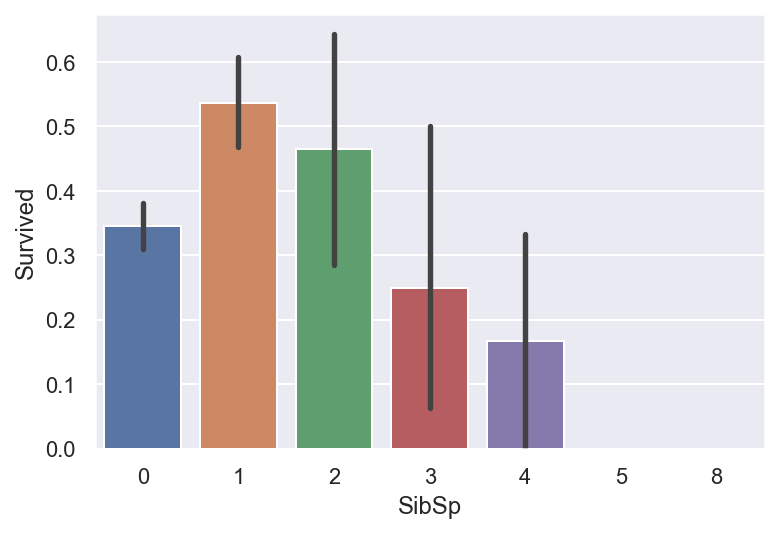

In [205]:
sns.barplot(data=train, x='SibSp', y='Survived')

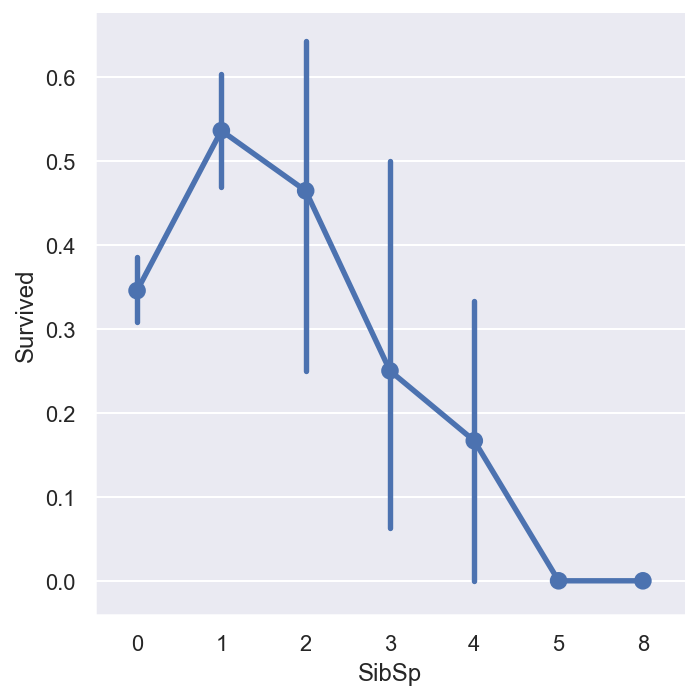

In [206]:
sns.factorplot(data=train, x='SibSp', y='Survived')

Passengers with no siblings have around **35%** survival rate. Survival chances decreases as the number of siblings or spouses increases. 

This is understandable imagining if you are on board with family, you tend to save them even at the expense of your life. 

In [207]:
t = train.pivot_table(index='SibSp', columns='Pclass', values='Survived', aggfunc='count')
t.loc['Total', :] = t.sum(axis=0)
t.loc[:, 'Total'] = t.sum(axis=1)

In [208]:
t.style.background_gradient(cmap='Blues')

Pclass,1,2,3,Total
SibSp,,,,
0,137.000000,120.000000,351.000000,608.000000
1,71.000000,55.000000,83.000000,209.000000
2,5.000000,8.000000,15.000000,28.000000
3,3.000000,1.000000,12.000000,16.000000
4,nan,nan,18.000000,18.000000
5,nan,nan,5.000000,5.000000
8,nan,nan,7.000000,7.000000
Total,216.000000,184.000000,491.000000,891.000000


For cmap colors : https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html


`SibSp > 3` only exists in Pclass 3 and their survival rate is **0%**, showing that passengers in Pclass 3 with large families all died.  

In [209]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 8))

# sns.barplot(data=train, x='SibSp', y='Survived', ax=axes[0])
# axes[0].set_title('SibSp by Survived (bar)')
# sns.factorplot(data=train, x='SibSp', y='Survived', ax=axes[1])
# axes[1].set_title('SibSp by Survived (factor)')

In [210]:
# 'Parch' : discrete
train.pivot_table(index='Parch', columns='Pclass', values='Survived', aggfunc='count').style.background_gradient(cmap='RdPu')

Pclass,1,2,3
Parch,,,
0,163.000000,134.000000,381.000000
1,31.000000,32.000000,55.000000
2,21.000000,16.000000,43.000000
3,nan,2.000000,3.000000
4,1.000000,nan,3.000000
5,nan,nan,5.000000
6,nan,nan,1.000000


It also shows that large families mainly were in Pclass 3.

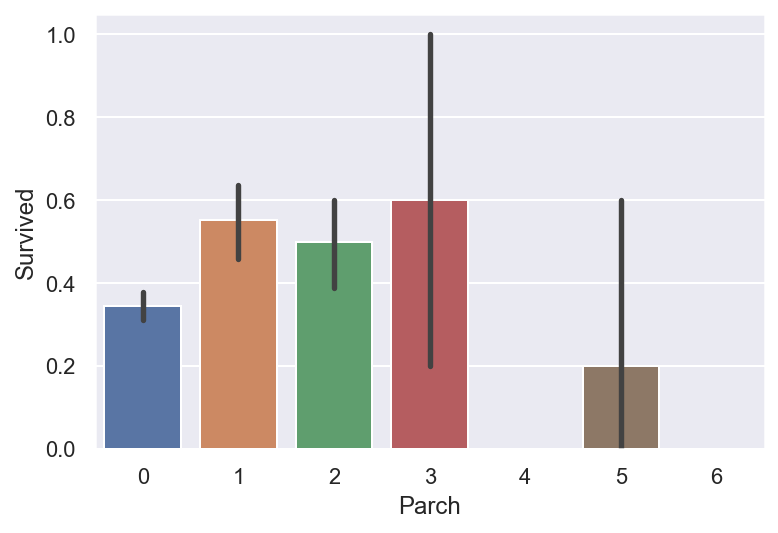

In [211]:
sns.barplot(data=train, x='Parch', y='Survived')

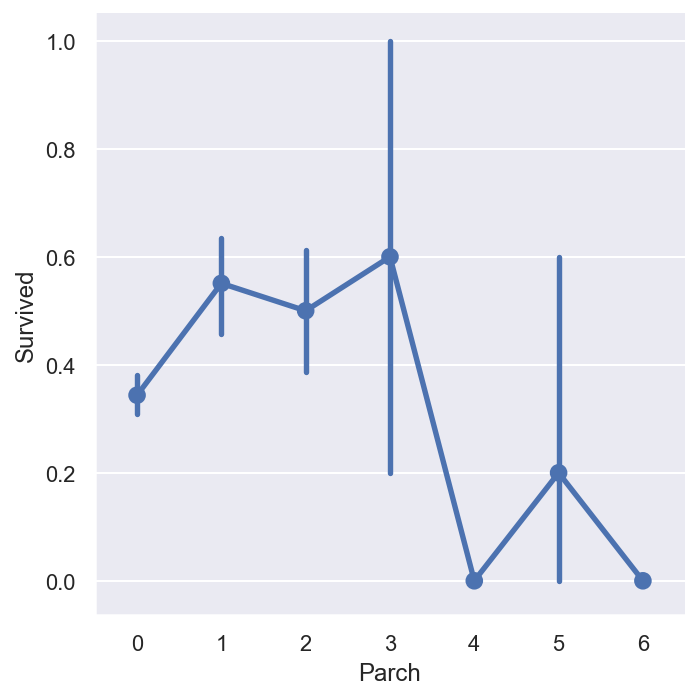

In [212]:
sns.factorplot(data=train, x='Parch', y='Survived')

Similarly, though thoes with parents have greater chances of survival, it lowers the number as the total number enlarges. 

The survival chances are good with 1-3 parents, but it becomes fatal after 3. 

In [213]:
# 'Fare' : continuous
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Fare in Pclass 3')

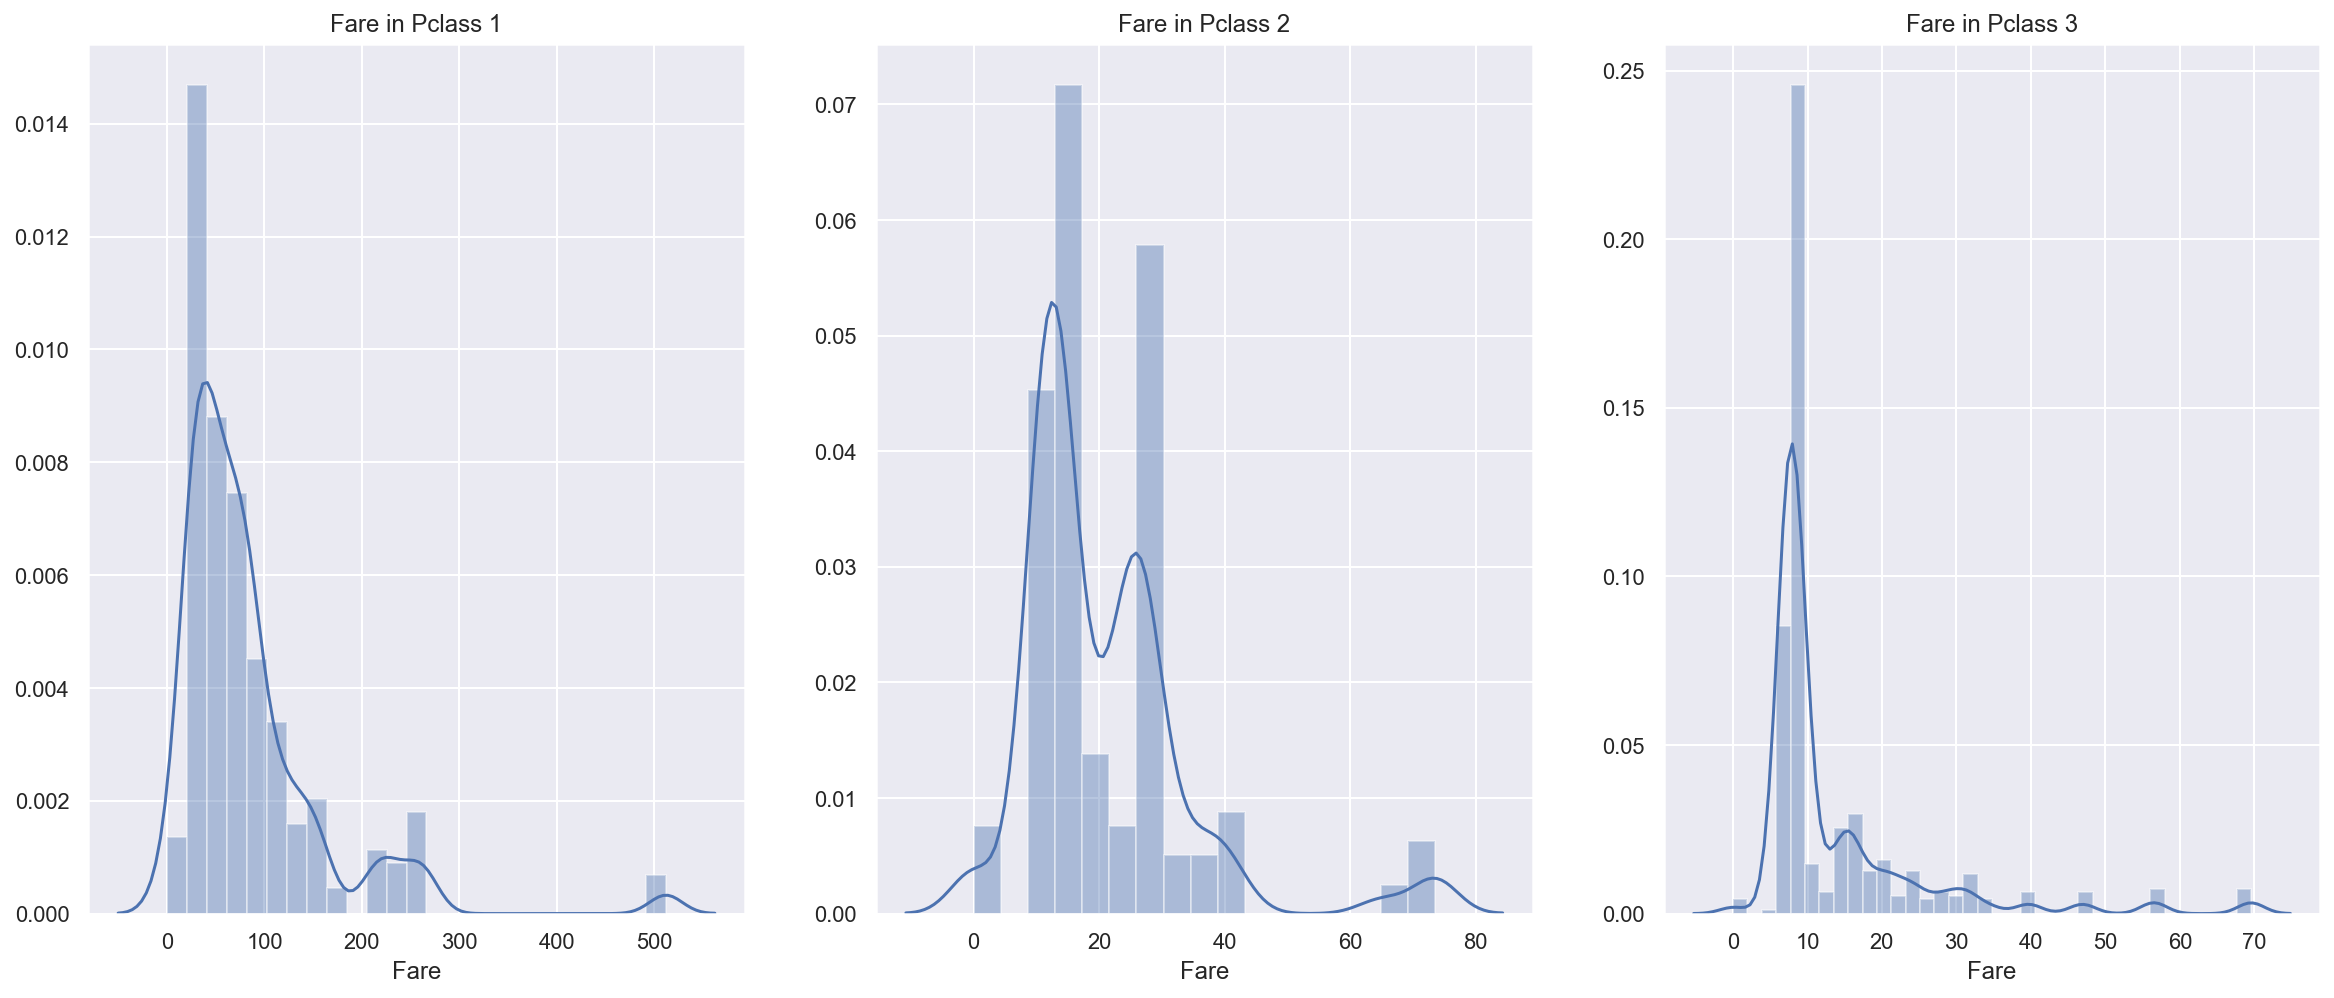

In [214]:
# 'Fare' with 'Pclass'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

sns.distplot(train[train.Pclass == 1].Fare, ax=axes[0])
axes[0].set_title('Fare in Pclass 1')

sns.distplot(train[train.Pclass == 2].Fare, ax=axes[1])
axes[1].set_title('Fare in Pclass 2')

sns.distplot(train[train.Pclass == 3].Fare, ax=axes[2])
axes[2].set_title('Fare in Pclass 3')

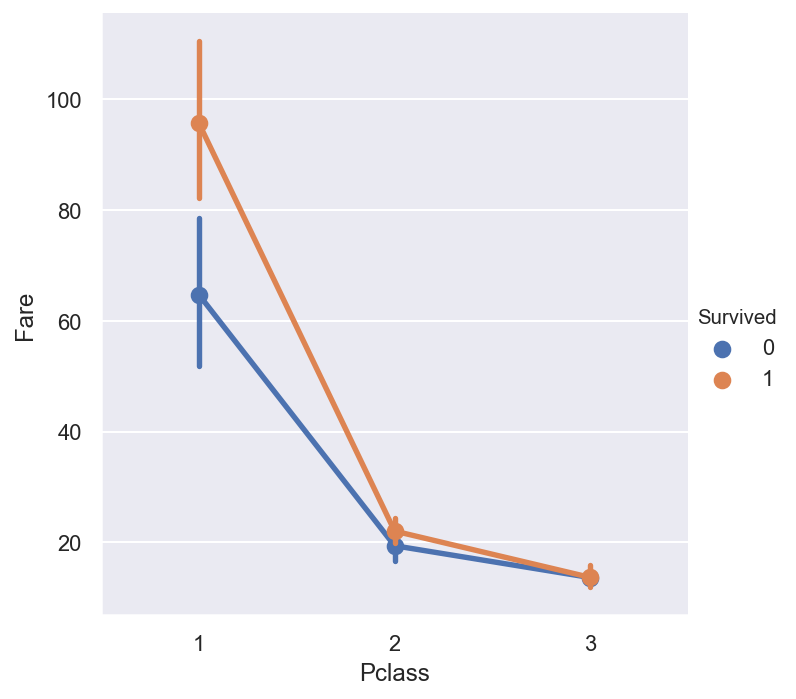

In [215]:
sns.factorplot(data=train, x='Pclass', y='Fare', hue='Survived')

People survived from the disaster seemed to pay higher 'Fare'.

#### Correlation between features

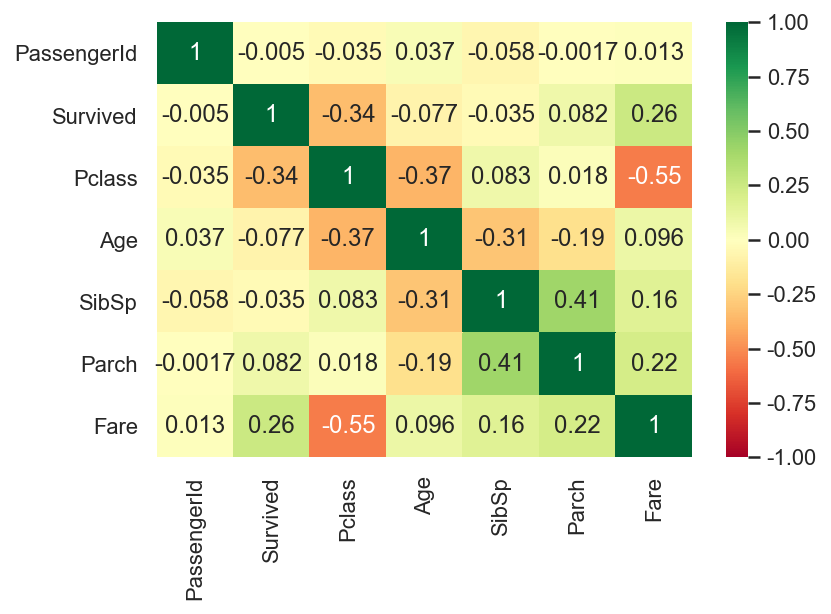

In [216]:
# plt.figure(figsize=(15, 7))
sns.heatmap(data=train.corr(), annot=True, cmap='RdYlGn', vmax=1, vmin=-1)

*MultiColinearity : when 2 features corrleated greatly, then increase in one can lead to the increase/decrease in the other, meaning containing information from both features are redundunt. For this reason, it's only fair to eliminate one of them.* 

From the heatmap above, 'Pclass' and 'Fare' & 'SibSp' and 'Parch' seem to be correlated. 

### Missing values (Null)

In [217]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [218]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Majority of missing values are included in 'Age' and 'Cabin' columns.

#### Age

Mean ages of female and male are different, **28** for female and **30** for male.<br>

This means, if we are there to replace missing values in 'Age' column with mean value, dividing them by 'Sex' should precede. 

In [219]:
# GPronoun : gender pronoun
train['GPronoun'] = 0

for i in train:
    train['GPronoun'] = train.Name.str.extract('([A-Za-z]+)\.')

train.GPronoun.head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: GPronoun, dtype: object

Via **Regex**, extract letters before `.(dot)` from 'Name' in order to identify the gender of the passengers.

In [220]:
pd.crosstab(index=train.Sex, columns=train.GPronoun).style.background_gradient(cmap='summer_r')

GPronoun,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Here, 'Mlle' or 'Mme' are misspelled for 'Miss'.

In [221]:
train['GPronoun'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],
                          ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [222]:
train.groupby('GPronoun')['Age'].mean()

GPronoun
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [223]:
# filling na with ceil values of the mean age
train.loc[(train.Age.isnull()) & (train.GPronoun == 'Mr'), 'Age'] = 33
train.loc[(train.Age.isnull()) & (train.GPronoun == 'Mrs'), 'Age'] = 36
train.loc[(train.Age.isnull()) & (train.GPronoun == 'Master'), 'Age'] = 5
train.loc[(train.Age.isnull()) & (train.GPronoun == 'Miss'), 'Age'] = 22
train.loc[(train.Age.isnull()) & (train.GPronoun == 'Other'), 'Age'] = 46

In [224]:
train.Age.isnull().sum()

0

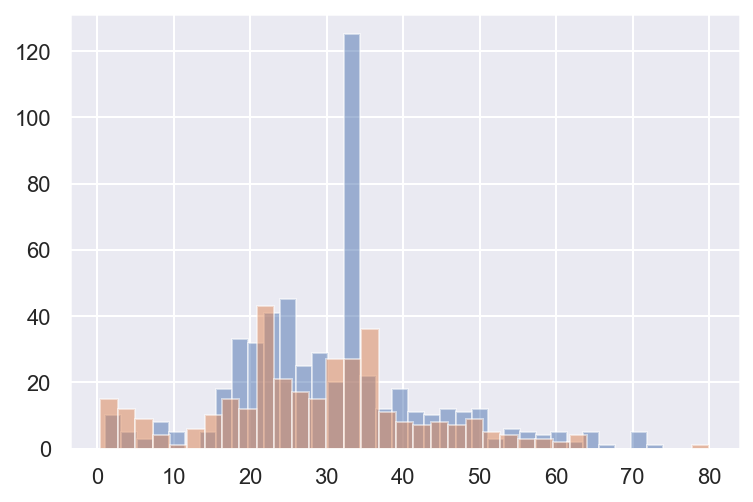

In [225]:
train.loc[train['Survived'] == 0, 'Age'].hist(bins=35, alpha=0.5)
train.loc[train['Survived'] == 1, 'Age'].hist(bins=35, alpha=0.5)

Age under 5 and age over 80 were saved. Maximum number of deaths lies in the age between 30 and 40.

#### Embarked

In [226]:
train.Embarked.isnull().sum()

2

In [227]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [228]:
# fillna with 'S'
train['Embarked'].fillna('S', inplace=True)

In [229]:
train['Embarked'].isnull().sum()

0

In [230]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

### fill test['Survived']

Let's fill test['Survived'] using 'Sex', 'Age', and 'Embarked'.

In [231]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [232]:
test.shape

(418, 11)

In [233]:
test_sex = test.copy()

In [234]:
test_pclass = test.copy()

#### with Sex

In [235]:
test[(test.Sex == 'female') & (test.Age > 0) & (test.Embarked)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
...,...,...,...,...,...,...,...,...,...,...,...
402,1294,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,112378,59.4000,NaN,C
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S


In [236]:
test_sex['Survived'] = (test.Sex == 'female') & (test.Age > 0) & (test.Embarked)

In [237]:
test_sex.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,True
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,False


#### with Pclass

In [240]:
test_pclass['Survived'] = ((test.Sex == 'female') & (test.Pclass == 1)) | ((test.Sex == 'female') & (test.Pclass == 2))

In [241]:
test_pclass.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,False
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,False


### for submission
 - [SettingwithCopyWarning in Pandas](https://www.dataquest.io/blog/settingwithcopywarning/)

In [243]:
submission1 = test_sex[['PassengerId', 'Survived']].copy()
submission1.head(3)

,PassengerId,Survived
0,892,False
1,893,True
2,894,False


In [244]:
submission2 = test_pclass[['PassengerId', 'Survived']].copy()
submission2.head(3)

,PassengerId,Survived
0,892,False
1,893,False
2,894,False


In [245]:
submission1.dtypes

PassengerId    int64
Survived        bool
dtype: object

In [246]:
submission2.dtypes

PassengerId    int64
Survived        bool
dtype: object

#### change dtype from bool to int

In [247]:
submission1['Survived'] = submission1['Survived'].astype(int)
submission1.dtypes

PassengerId    int64
Survived       int32
dtype: object

In [248]:
submission2['Survived'] = submission2['Survived'].astype(int)
submission2.dtypes

PassengerId    int64
Survived       int32
dtype: object

#### save as csv file

In [249]:
submission1.to_csv('data/submission1.csv', index=False)

In [250]:
pd.read_csv('data/submission1.csv')

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [251]:
submission2.to_csv('./data/submission2.csv', index=False)

In [252]:
pd.read_csv('./data/submission2.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
